In [1]:
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'dpi':200, 'bbox_inches': 'tight'}
# The previous configuration allows larger inline figures in Jupyter without changing output figure size.
# This is useful to keep figures at a consistent size for publishing.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import json

from Kuramoto_model import *
from network_of_oscillators_integrate_and_sync_quantifiers import *
from network_of_oscillators_plot_utils import *

from matplotlib_latex_configurations import *
from matplotlib.animation import FuncAnimation 
from IPython.display import HTML
rcParams['figure.figsize'] = (one_column_figure_size * golden_ration, one_column_figure_size)

In [3]:
def complete_graph(n):
    G = nx.complete_graph(n)
    adj_list = []
    for x in G.adjacency():
        for y in x[1]:
            adj_list.append([x[0],y])
    return np.asarray(adj_list)

def uniform_aij(n, u, l):
    c = np.random.uniform(u, l, size=(n,n))
    c[np.tril_indices(n)] = c.T[np.tril_indices(n)]
    c[np.diag_indices(n)] = 0
    return c

def create_model(n, u, l, w=10):
    w = w*(np.random.rand(n)-0.5)
    E = complete_graph(n)
    theta0 = 2*np.pi*np.random.rand(n)
    c = uniform_aij(n,u,l)
    kuramotoModel = KuramotoModel(w, E, c = c)
    return kuramotoModel, theta0

In [4]:
%%time
runs = 500
N, U, L, W = 20, 0.1, 0.4, 10
res_ps, res_r, res_cmean = [], [], []
data = []
for _ in range(runs):
    kuramoto, theta0 = create_model(N, U, L, w=W)
    kuramoto.tau = 0
    out=integrate_and_measure(kuramoto, theta0, tf=10)
    cmean = kuramoto.c.mean()
    print(out['mean_r'], out['partial_sync'], cmean)
    #t, theta, r, psi = unpack_print(out)
    res_ps.append(out['partial_sync'])
    res_r.append(out['mean_r'])
    res_cmean.append(cmean)
    data.append({'a': kuramoto.A,
                 'c': kuramoto.c.tolist(),
                'w': kuramoto.w.tolist(),
                'h': theta0.tolist(),
                'r': out['mean_r'],
                'ps': out['partial_sync']})
    
with open('./data_N20_U0x1_L0x4_w10_run500.json', 'w') as fp:
    json.dump(data, fp, indent=None)

0.6494273273711554 0.8513641375200336 0.24836319787020705
0.5803030505176368 0.791553437649975 0.23917767770249476
0.6901389902089841 0.8857800578928531 0.24869669914253298
0.6693145067853802 0.8152415712365384 0.23164375506229182
0.4228194604248637 0.5703321433842496 0.2359221814370438
0.3758749686418555 0.6273357560692504 0.23701276097008034
0.8031278669802483 0.9999918797658948 0.24968902552353334
0.3164101982299671 0.44667408365475636 0.2284603678768266
0.35978607571132953 0.49948108944726066 0.2407293886492915
0.47040864559710854 0.6961031556680987 0.24301912239931184
0.3592198702647034 0.5102186105164856 0.23661203327216918
0.6168683893025195 0.8446258373209309 0.23518247472704587
0.38050720491355455 0.5558958458292558 0.24129051030242565
0.8447078619254762 0.9990080879444448 0.23247938792416356
0.7421426058719479 0.9201441511112127 0.24724306458551282
0.32304927914303677 0.44759669460268575 0.23150014036635377
0.4626506441507803 0.6914379523439335 0.24343709264811816
0.661104745

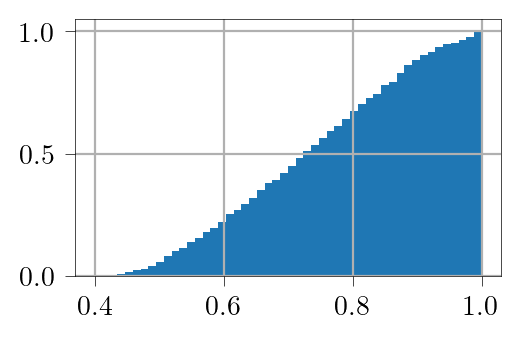

In [18]:
plt.hist(res_ps, 50, cumulative=True, density=1);
plt.grid()

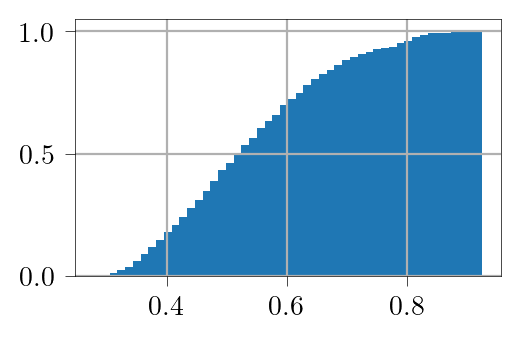

In [19]:
plt.hist(res_r,50, cumulative=True, density=1);
plt.grid()

In [26]:
!ls -lh data_N20_U0x1_L0x4_w10_run500.json

-rw-rw-r-- 1 yren yren 1.1M Mar 11 12:52 data_N20_U0x1_L0x4_w10_run500.json


0.4231390165832518 0.6467898007460462


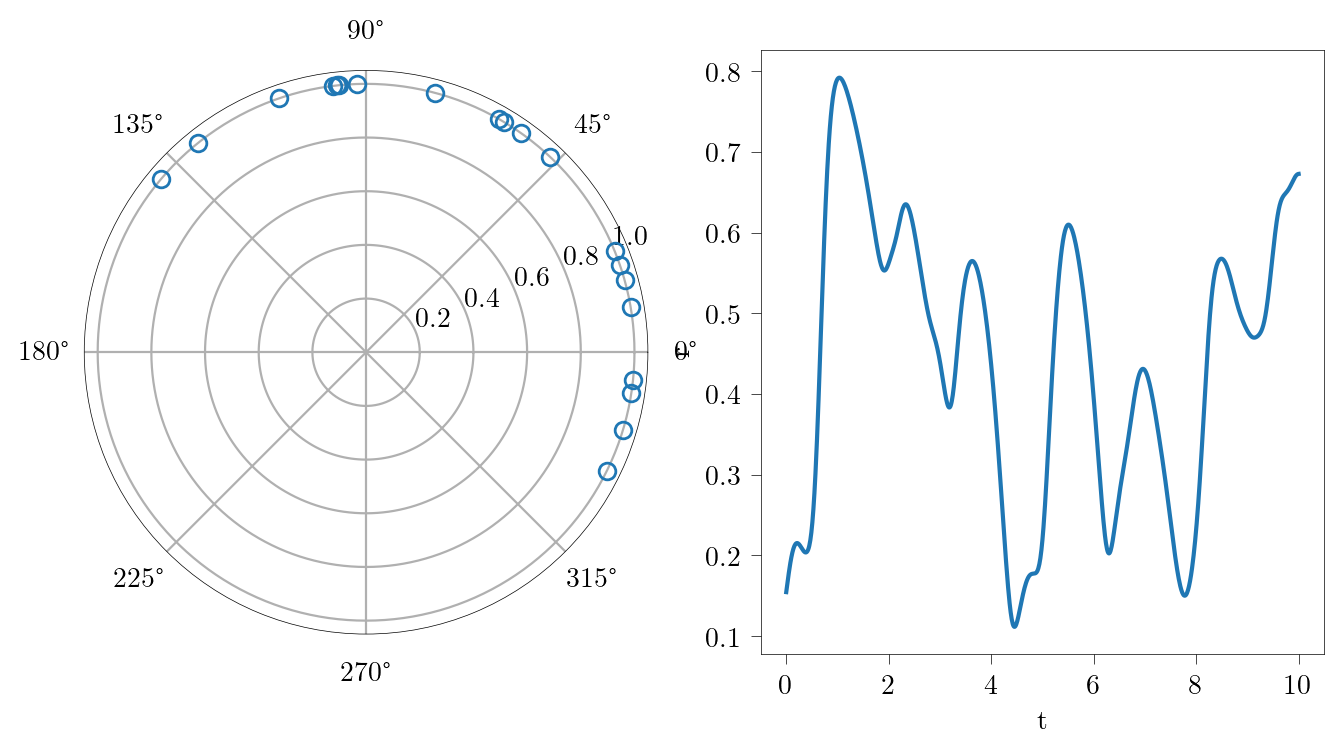

In [27]:
N, U, L = 20, 0.1, 0.4
kuramotoModel, theta0 = create_model(N, U, L, w=10)
kuramotoModel.tau = 0
out=integrate_and_measure(kuramotoModel, theta0, tf=10)
print(out['mean_r'], out['partial_sync'])
t, theta, r, psi = unpack_print(out)

fig = plt.figure(figsize=(8,4));
ax = plt.subplot(121, polar=True);
line, = ax.plot([],[], 'o',fillstyle='none');
idx = 0
def update(b):
    global idx
    line.set_xdata(theta[idx,:])
    line.set_ydata(np.repeat(1,N))
    idx += 10
    return line,
ax2 = plt.subplot(122)
ax2.plot(t,r)
ax2.set_xlabel('t')
ax2.set_ylabel('r')
ani = FuncAnimation(fig, update, frames=t[:-11:10], blit=True);
HTML(ani.to_html5_video())

Numerical integration with time delay

In [37]:
%%time
kuramotoModel.tau = 0.1
out=integrate_and_measure(kuramotoModel, theta0, tf=100)
print(out['mean_r'], out['partial_sync'])
t, theta, r, psi = unpack_print(out)

0.9190726396992766 0.9999999999045514
CPU times: user 4.91 s, sys: 25.9 ms, total: 4.94 s
Wall time: 4.95 s


Plot time evolution of the order parameter

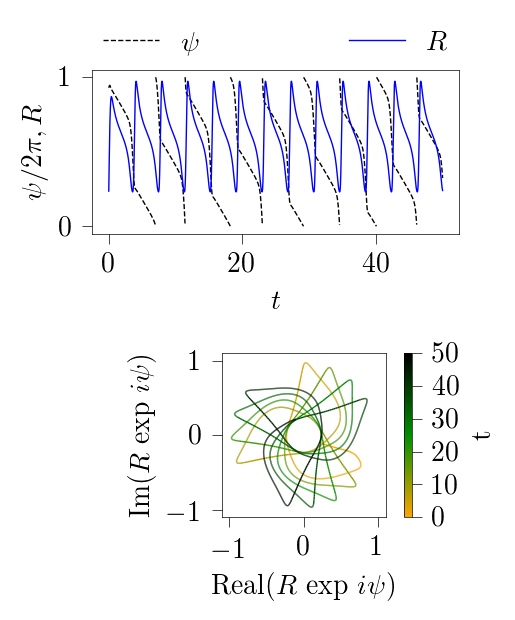

In [8]:
fig, ((ax1, ax2)) = plt.subplots(2, 1, figsize=(2.75, 3))

tlim = [0, 50]
plot_r_psi(t, r, psi, tlim = tlim, ax=ax1)
legend = ax1.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0., frameon=False)

plot_r_exp_psi(t, r, psi, tlim = tlim, ax=ax2)

plt.tight_layout()

# plt.savefig("tex_example\\orderParameter.pdf")

Plot phase variables

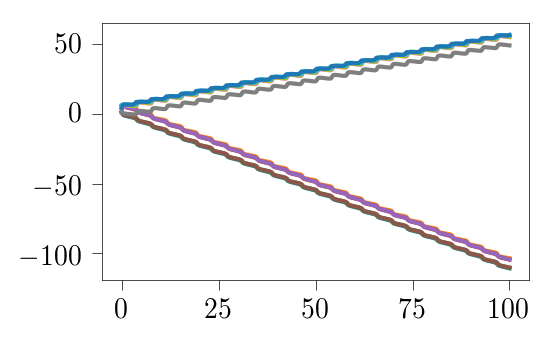

In [9]:
for i in range(len(w)):
    plt.plot(t, theta[:, i])

Plot phase variables in the unit circle

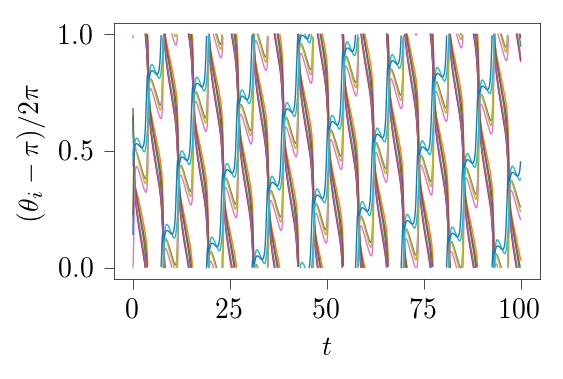

In [10]:
plot_phase_mod_2pi(t, theta)

Plot phase variables histogram in the unit circle

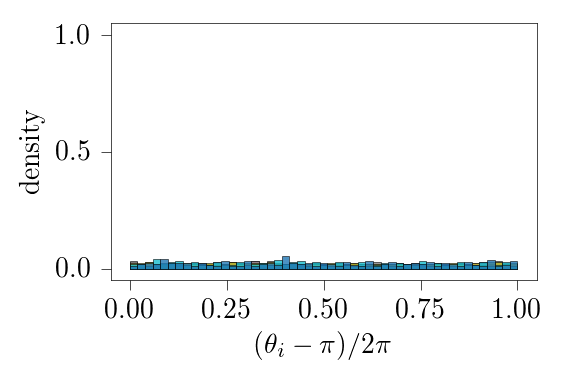

In [11]:
plot_phase_mod_2pi_histogram(theta)

Plot phase in the unit circles with more parameters

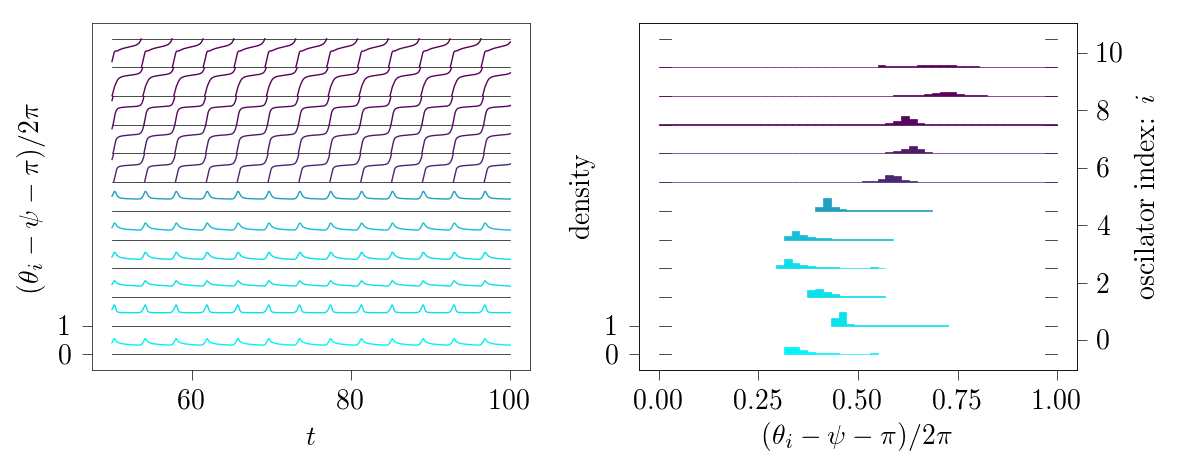

In [13]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(6,2.5))
sel = [0, 1, 9, 10]

plot_phase_mod_2pi(t, theta, psi, tlim = [50,100], 
                   color = frequency_to_color(w),
#                    sel = sel,
                   shift_axis = True,
                   show_right_ax_labels = False,
                   ax = ax1)

plot_phase_mod_2pi_histogram(theta, psi,
                    color = frequency_to_color(w),
#                     sel = sel,
                    shift_axis = True,
                    ax = ax2)

plt.tight_layout()
# plt.savefig("tex_example\\phaseVariables.pdf")

With the previous plot we can see that magenta oscillators (wi>0) exhibit phase slips in comparison with the mean phase psi, while blue oscillators (wi<0) fluctuate around mean phase.

Examples of plots increasing coupling parameters

In [34]:
#Increasing coupling parameter
def plot_increasing_c(c0, cf, cstep):
    out = {}
    for kuramotoModel.c in arange_(c0, cf, cstep):
        out_aux = integrate_and_measure(kuramotoModel, theta0, tf=100)
        out[kuramotoModel.c] = {'mean_r': out_aux['mean_r'], 'partial_sync': out_aux['partial_sync']}

    cs, partial_sync, mean_r = zip(*[ [c,  out[c]['partial_sync'],  out[c]['mean_r']] for c in out.keys()])
    fig, ax = plt.subplots(1, figsize=( one_column_figure_size * golden_ration,one_column_figure_size))
    ax.plot(cs,partial_sync, '-bo',  markersize=2, label=r'$S$ (partial sync)', linewidth = 0.5)
    ax.plot(cs,mean_r, '-ko', markersize=2, label=r'$R$', linewidth = 0.5)
    ax.set_xlabel(r'$c$')
    ax.set_ylabel(r'$S$,$R$')
    legend = ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
               ncol=2, mode="expand", borderaxespad=0., frameon=False)
    ax.set_ylim([0, 1.1])

Wall time: 27.6 s


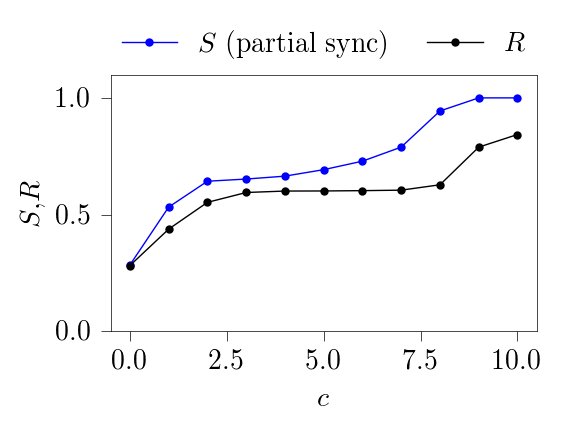

In [35]:
%%time
kuramotoModel.tau = 0
plot_increasing_c(0, 10, 1)
# plt.savefig("tex_example\\increasingCTau00.pdf")

Wall time: 2min 1s


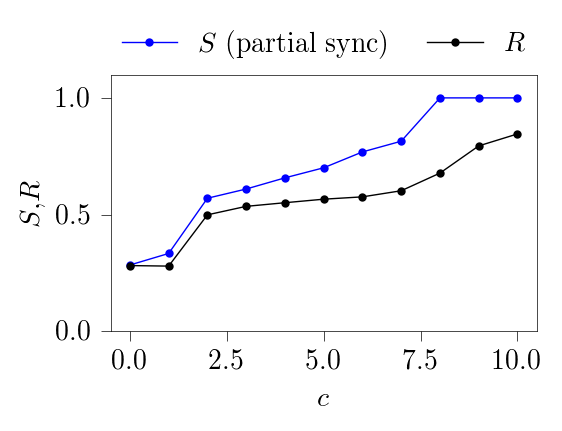

In [37]:
%%time
kuramotoModel.tau = 0.5
plot_increasing_c(0, 10, 1)
# plt.savefig("tex_example\\increasingCTau05.pdf")

In [96]:
# Reading natural frequencies of vertices w and edges of the coupling graph E, 
# and setting the kuramotoModel.
w=np.loadtxt('parameters/K5.Freq')
E=np.loadtxt('parameters/K5.net')
theta0=np.loadtxt('parameters/K5.Ic')

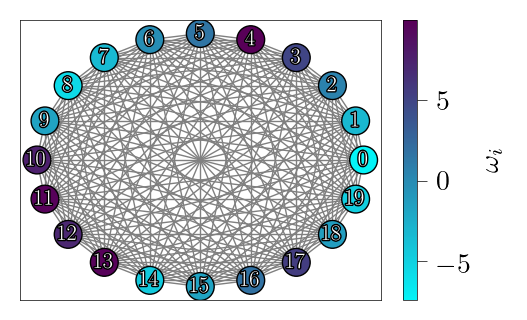

In [135]:
plot_coupling_graph(E, w)
plt.tight_layout()    
# plt.savefig("tex_example\\graph.pdf")